In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [4]:
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
z=np.abs(stats.zscore(data))
print(z)

[[1.51005294 1.36011263]
 [1.43837321 1.10552744]
 [1.36669348 1.419919  ]
 [1.18749416 1.20495739]
 [1.11581443 1.33978143]
 [0.86493538 0.71830716]
 [0.82909552 0.58815781]
 [0.75741579 0.79981746]
 [0.75741579 0.42881019]
 [0.57821647 0.69801306]
 [0.50653674 0.47433279]
 [0.47069688 0.74976858]
 [0.47069688 0.70662043]
 [0.43485702 0.70201994]
 [0.29149756 0.55250402]
 [0.1481381  0.29921736]
 [0.07645838 0.37004264]
 [0.00477865 0.26285865]
 [0.21026054 0.19885989]
 [0.2461004  0.66547573]
 [0.53281931 0.58377993]
 [0.6403389  0.82623317]
 [0.92705781 0.93861127]
 [1.03457741 1.40274136]
 [1.21377673 1.24020308]
 [1.32129632 1.09740238]
 [1.50049564 1.51986835]
 [1.5363355  1.3590738 ]
 [1.78721455 1.72102849]
 [1.85889428 1.70177321]]


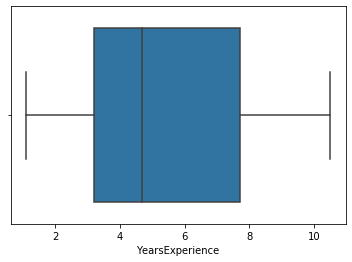

In [7]:
sns.boxplot(x=data['YearsExperience'])

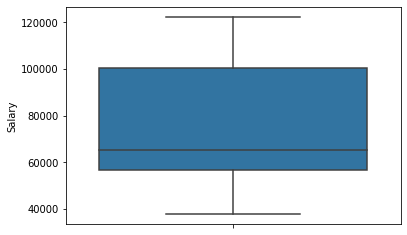

In [8]:
sns.boxplot(y=data['Salary'])

In [9]:
f_data=data[(z<3).all(axis=1)]
f_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
print(len(data))
print(len(f_data))
if(len(data)==len(f_data)):
    print('No outliers')

30
30
No outliers


In [11]:
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [12]:
train_data,test_data=train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

27


,YearsExperience,Salary
20,0.606383,0.637928
29,1.000000,0.993870
19,0.521277,0.663938
7,0.223404,0.197425
23,0.755319,0.898665


In [13]:
x=np.array(train_data['YearsExperience'])
y=np.array(train_data['Salary'])

In [15]:
m=1
c=-1
epochs=100 # epochs
l=0.1      # learning rate
err=[]
ns=len(x)
for i in range(epochs):
    er=0
    m_d=0
    c_d=0
    for j in range(len(x)):
        er+=((y[j]-(m*x[j])-c))**2
        m_d=m_d+((-1.0)*((y[j]-m*x[j]-c)*x[j]))
        c_d=c_d+((-1.0)*(y[j]-m*x[j]-c))
    m_d=m_d/ns
    c_d=c_d/ns
    d_m=-l*m_d
    d_c=-l*c_d
    m=m+d_m
    c=c+d_c
    er=(1/(2*len(train_data['YearsExperience'])))*(er)
    err.append(er)
print("The local minimum occurs at m =%.2f"%(m),", c = %.2f"%(c))
print(err)

The local minimum occurs at m =1.21 , c = -0.09
[0.5132807196007086, 0.39785162925802225, 0.3087338671882998, 0.23992626887220206, 0.1867964872859253, 0.1457687758022224, 0.11408298550356333, 0.08960853342631787, 0.07070080327284523, 0.056090300059151596, 0.04479708776747887, 0.03606474313725377, 0.029309374107475052, 0.024080266774885426, 0.02002950848942464, 0.016888539696394787, 0.014450054129427885, 0.012554027434972671, 0.011076932563591173, 0.009923415050116393, 0.00901986710021082, 0.008309467379628016, 0.007748352190232293, 0.00730265997182764, 0.006946249930642331, 0.00665894103117034, 0.00642515266034268, 0.0062328553455477335, 0.00607276080551799, 0.005937696744033897, 0.0058221242479822525, 0.005721765262778408, 0.0056333150373274795, 0.005554220157609057, 0.005482507208613385, 0.0054166505166842365, 0.0053554700583245555, 0.005298052654725539, 0.005243691140725441, 0.005191837408371262, 0.00514206616039633, 0.005094046930768658, 0.0050475224866595786, 0.005002292156285076,

In [16]:
#RMSE FOR TRAINING DATA
train_data_pred=m*train_data['YearsExperience']+c

In [17]:
yp=[]
for i in range(len(x)):
  p=(m*x[i])+c
  yp.append(p)
print("Predicted values (yp) : ",yp)

Predicted values (yp) :  [0.6460542333365209, 1.1240593918261153, 0.5427017666360683, 0.1809681331844834, 0.8269210500623133, 0.3489158915727192, 1.0077878667881057, 0.42643024159805876, 0.025939433133804174, -0.06449397522909202, 0.9948688084505493, 0.1551300165093702, -0.09033209190420521, 0.8915163417500964, 0.051777549808917384, -0.03865585855397882, 0.1809681331844834, 0.5297827082985117, 0.4522683582731719, 0.2843205998849362, 0.2714015415473796, 0.14221095817181356, 0.40059212492294566, 1.098221275151002, 0.29723965822249276, 0.7881638750496437, 0.6848114083491907]


In [18]:
sum=0
for i in range(len(x)):
    sum+=(y[i]-yp[i])**2
    mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  0.006711364924513923


Text(0.5, 1.0, 'Predicted data vs Actual data')

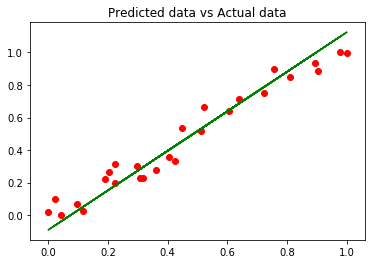

In [19]:
plt.plot(np.array(train_data['YearsExperience']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['YearsExperience']),np.array(train_data['Salary']),color='red')
plt.title("Predicted data vs Actual data")

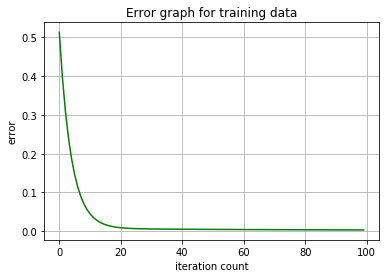

In [20]:
iters=np.arange(epochs)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [21]:
#TO TEST DATA
tx=np.array(test_data['YearsExperience'])
ty=np.array(test_data['Salary'])
test_data_pred=m*test_data['YearsExperience']+c
print(test_data_pred)

9     0.245563
25    0.930274
11    0.284321
Name: YearsExperience, dtype: float64


In [22]:
yp1=[]
for i in range(len(tx)):
    p1=(m*tx[i])+c
    yp1.append(p1)
print("Predicted values (yp) : ",yp1)

Predicted values (yp) :  [0.2455634248722664, 0.9302735167627663, 0.2843205998849362]


In [23]:
sum=0
for i in range(len(tx)):
    sum+=(ty[i]-yp1[i])**2
    mse1=sum/len(tx)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  0.0072925276147914365


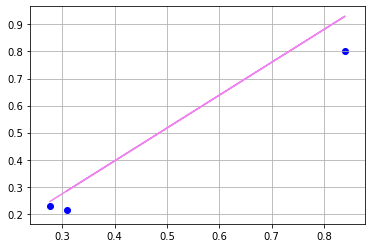

In [26]:
plt.scatter(test_data['YearsExperience'],test_data['Salary'],color='blue')
plt.plot(test_data['YearsExperience'],test_data_pred,'violet')
plt.grid()